# Neural Networks Exercise

In this notebook, we will extend create a 2-layer neural network using TensorFlow. 

**Note: there is a jump from how scikit and TensorFlow train their models.** It might be helpful to think that TensorFlow sets the design of the computation graph first, then starts a session to "feed" the data for training.

## Instructions
* Read each cell and implement the TODOs sequentially. The markdown/text cells also contain instructions which you need to follow to get the whole notebook working.
* Do not change the variable names unless the instructor allows you to.
* Answer all the markdown/text cells with "A: " on them. The answer must strictly consume one line only.
* You are expected to search how to some functions work on the Internet or via the docs. 
* You may add new cells for "scrap work".
* The notebooks will undergo a "Restart and Run All" command, so make sure that your code is working properly.
* You are expected to understand the data set loading and processing separately from this class.
* You may not reproduce this notebook or share them to anyone.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
print(tf.__version__)
from sklearn.model_selection import train_test_split
%matplotlib inline

plt.style.use('ggplot')

plt.rcParams['figure.figsize'] = (12.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'

# Fix the seed of the random number 
# generator so that your results will match ours
np.random.seed(1)

%load_ext autoreload
%autoreload 2

1.13.1


For the following experiments, we will be creating a 2 layer network.

<img src="https://i.imgur.com/qmlQoAG.png"/>

We will also be using TensorFlow. Please check out https://learningtensorflow.com/getting_started/ for a basics guide.

# Experiment 1: Dummy data

Let's first set the size of the layers of our network. We will use these variables later on in our code. (This is step **(a)**, see below)

Ideally, we should be getting the size of our input and output layer based on our data (the size of the hidden layer/s is/are completely up to us). But in this experiment, we will be creating our own dummy data with 10 features and 2 classes.

In [2]:
n_input = 10 # number of features/ size of the input layer (length of W[1]) (D)
n_hidden = 10 # number of neurons in the hidden layer (length of W[2])
n_output = 2 # number of classes/labels (K)
n_instances = 100 # number of instances (N)

Generate a random dataset (dummy data).

In [3]:
def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(n_instances, n_input)
    y = np.random.choice([0,1], size=(n_instances,), replace=True)
    Y = np.zeros(shape=(n_instances, n_output))
    Y[np.arange(0, len(y)),y]=1
    return X, Y

X, Y = init_toy_data()

print(X.shape, Y.shape)
# print(X, "\n", Y)

(100, 10) (100, 2)


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(70, 10)
(30, 10)
(70, 2)
(30, 2)


In [5]:
# Setting the random seed to make sure your output is same with ours
RANDOM_SEED = 42
tf.set_random_seed(RANDOM_SEED)

Our code will follow the following steps in building a two layer network:

```
**(a)** set up the size of our network 
**(b)** initialize weights variables 
**(c)** initialize our data placeholders

start loop
**(d)** do forward propagation
**(e)** get the predictions
**(f)** calculate for the loss (predictions - ground truth)
**(g)** do backward propagation to update/optimize the weight variables (see **(c)**) : 
end loop

```
Notes on ```**(a)**```: <br>
We already did this a few cells before

Notes on ```**(b)**```: <br>
TensorFlow has `variables`, which are normal variables we use in coding. By declaring our weights as Tensorflow variables, we are saying that this value should be updated during gradient descent.

Notes on ```**(c)**```: <br>
TensorFlow uses `placeholders` for inputs that we will feed in later (our data X). We do not put in the values of X when designing our model (we do that in training), but we should know the shape of our input.

Notes on ```**(g)**```: <br>
We'll use Adam as our optimizer.


```**(d)** and **(b)**``` will be in their separate methods


### ```**(b)**``` **initialize our weights**

We will just initialize our weights simply following a normal distribution formula. This will suit our small dataset.

Remember, we have two sets of weights for our two layers. 

In [ ]:
tf.random_normal?
tf.Variable?

In [6]:
def init_weights(n_input, n_hidden, n_output):
    """ Weight initialization """
    # Declare the size of the weights
    # TODO : Initialize the weight using tf.random.normal, give it a std dev of 0.1   
    #        Set the seed parameter to 42 so we will get the same result
    ### START CODE HERE ###
    w1 = tf.random.normal(shape=(n_input, n_hidden), stddev=0.1,seed=42)
    w2 = tf.random.normal(shape=(n_hidden, n_output), stddev=0.1,seed=42)
    ### END CODE HERE ###
    
    # Here, we will declare our weights as tf.Variables
    # Inputs in TensorFlow that are variables will be updated during gradient descent
    # If we want our weights to be updated, we have to declare them as  variables
    weights = {
        'w1': tf.Variable(w1),
        'w2': tf.Variable(w2)
    }

    return weights

weights = init_weights(n_input, n_hidden, n_output)

Instructions for updating:
Colocations handled automatically by placer.


(Sanity check below). Printing out the values in TensorFlow is not as easy before. Here, we have to "run" the whole computation graph to see the value:

In [7]:
# start session
session = tf.Session()

# initialize
init = tf.global_variables_initializer()
session.run(init)

# call weights (which wil then call init_weights)
print(session.run(weights))

# close the session
session.close()

{'w1': array([[ 0.13148774, -0.01542157,  0.09113878, -0.07991441, -0.01087529,
         0.02843679,  0.07661625, -0.06211289,  0.09974318,  0.02195926],
       [-0.10798668, -0.19874832,  0.15603696, -0.01690948, -0.13780487,
        -0.02980155,  0.08410001,  0.09225498, -0.04837923, -0.16971248],
       [ 0.00953648, -0.01067538, -0.17839275,  0.17145915, -0.11761415,
         0.11488946,  0.04505377, -0.08172406,  0.09519397,  0.13913034],
       [ 0.01586228,  0.01048807,  0.11451166, -0.10479503,  0.02145801,
         0.02575068, -0.09960396,  0.055202  , -0.08870138,  0.34017047],
       [ 0.03429196, -0.04389471, -0.15277438, -0.08316436,  0.03434062,
        -0.27989998, -0.09340011, -0.04060407,  0.12880985,  0.12897399],
       [-0.03741515, -0.14218496, -0.01342447,  0.10253482, -0.32489178,
         0.18755275,  0.08539876,  0.06199211, -0.02141522,  0.20731623],
       [ 0.01948587, -0.03687083,  0.03235206,  0.17784952,  0.06728835,
         0.11926039,  0.00293781,  0.1

**Sanity Check: **


Your result should exactly match the one below (because we set the random seed)
```
{'w1': array([[ 0.13148773, -0.01542157,  0.09113878, -0.07991441, -0.01087529,
         0.02843679,  0.07661625, -0.06211289,  0.09974318,  0.02195926],
       [-0.10798668, -0.19874832,  0.15603696, -0.01690948, -0.13780487,
        -0.02980155,  0.08410001,  0.09225498, -0.04837923, -0.1697125 ],
       [ 0.00953648, -0.01067538, -0.17839274,  0.17145914, -0.11761414,
         0.11488946,  0.04505377, -0.08172406,  0.09519397,  0.13913034],
       [ 0.01586228,  0.01048807,  0.11451166, -0.10479503,  0.02145801,
         0.02575068, -0.09960396,  0.055202  , -0.08870138,  0.34017047],
       [ 0.03429196, -0.04389471, -0.15277438, -0.08316436,  0.03434062,
        -0.27989998, -0.09340011, -0.04060407,  0.12880985,  0.12897399],
       [-0.03741515, -0.14218496, -0.01342447,  0.10253482, -0.32489178,
         0.18755275,  0.08539876,  0.06199211, -0.02141522,  0.20731623],
       [ 0.01948587, -0.03687083,  0.03235206,  0.17784952,  0.06728835,
         0.11926039,  0.00293781,  0.13695234, -0.08442237,  0.01464307],
       [-0.2167099 , -0.05404393, -0.13511175, -0.11596807, -0.027453  ,
        -0.07361402,  0.03883214, -0.02485349, -0.0798556 , -0.04665783],
       [ 0.11286335, -0.11491551,  0.02331937, -0.0759256 ,  0.03863364,
        -0.14149378, -0.17656256, -0.0665978 , -0.05536773, -0.14172284],
       [ 0.11051842,  0.12187224, -0.06621953,  0.07448888, -0.11173725,
         0.07188234,  0.05128387, -0.07941299,  0.1241065 , -0.08387285]], dtype=float32), 'w2': array([[ 0.13148773, -0.01542157],
       [ 0.09113878, -0.07991441],
       [-0.01087529,  0.02843679],
       [ 0.07661625, -0.06211289],
       [ 0.09974318,  0.02195926],
       [-0.10798668, -0.19874832],
       [ 0.15603696, -0.01690948],
       [-0.13780487, -0.02980155],
       [ 0.08410001,  0.09225498],
       [-0.04837923, -0.1697125 ]], dtype=float32)}


```

### ```**(c)**``` **forward propagation**.


In [8]:
def do_forwardprop(X, W1, W2):
    '''
    Input :
    X : a matrix with shape (?, n_input) or (?, D), the input we will feed to our model; ? means arbitrary
    W1: a matrix with shape (n_input, n_hidden), weights of our first layer
    W2: a matrix with shape (n_hidden, n_output), weights of our 2nd layer
    
    Output:
    z2 : a matrix with shape (n_instances,n_output), the score of the hidden layer 
    a2 : a matrix with shape (n_instances, n_output), the activation of the output 
    '''
    # TODO : Initialize the weight using tf.random.normal, give it a std dev of 0.1   
    #        Set the seed parameter to 42 so we will get the same result
    # HINT : Use tf.matmul for calculating the scores
    #        Use tf.nn.sigmoid for the sigmoid gate
    #        Make sure the matrix are ordered to be conformable
    ### START CODE HERE ###
    z1 = tf.matmul(X, W1)
    a1 = tf.nn.sigmoid(z1)
    z2 = tf.matmul(a1, W2)
    a2 = tf.nn.sigmoid(z2)
    ### END CODE HERE ###
    return a2, z2

(Sanity check below)

Building a computational graph typically includes:
1. Desigining our computational graph
2. Running our computation graph

In [9]:
# Step 1: Design our computation graph
# design our X as a placeholder
X = tf.placeholder("float32", shape=[None, n_input])
weights = init_weights(n_input, n_hidden, n_output)
forwardprop = do_forwardprop(X, weights['w1'], weights['w2'])

# Step 2: Run the computation graph
session = tf.Session()
init = tf.global_variables_initializer()
session.run(init)
# feed the values of our X tf.placeholder, this will be fed in when forwardprop is callled
# here, the value given to feed_dict's X should match the size of the tf.placeholder X
a2, z2 = session.run(forwardprop, feed_dict={X:[[1,2,3,4,5,6,7,8,9,10]]})
print("a2", a2, "\nz2",z2) # let's see the result
session.close()

a2 [[0.524076   0.44027126]] 
z2 [[ 0.09637842 -0.24006137]]


**Sanity Check: **

Your result should be :
```
a2 [[ 0.52407598  0.44027126]] 
z2 [[ 0.09637842 -0.24006137]]

```

**Pause**

The code above is a lot to take in. Try changing the code a little to see how it works. 

You can try:
- Creating a new method that only does adding/multiplying
- Changing the size of the placeholder and see what happens
- Removing parts of the code and see what happens

We believe that this is crucial before you will understand the next part.

## Now, let's piece the whole thing together

We will follow the pseudo code written above before:

```
**(a)** set up the size of our network 
**(b)** initialize weights variables 
**(c)** initialize our data placeholders

start loop
**(d)** do forward propagation
**(e)** get the predictions
**(f)** calculate for the loss (predictions - ground truth)
**(g)** do backward propagation to update/optimize the weight variables (see **(c)**) : 
end loop

```

In [10]:
def main(optimizer_fn):
    # loss_over_time will log down the loss per epoch
    loss_over_time = np.array([])

    # **(a)** set up the size of our network 
    # TODO : Place in the sizes of each layer in our network; copy paste as necessary
    #        Set the hidden layer size to 10
    ### START CODE HERE ###
    n_input = 10 # number of features/ size of the input layer (length of W[1]) (D)
    n_hidden = 10 # number of neurons in the hidden layer (length of W[2])
    n_output = 2 # number of classes/labels (K)
    n_instances = 100 # number of instances (N)
    ### END CODE HERE ###

    # **(b)** initialize weights variables 
    # TODO : Initialize the weights
    ### START CODE HERE ###
    weights = init_weights(n_input, n_hidden, n_output)
    ### END CODE HERE ###

    # **(c)** initialize our data placeholders
    # TODO : Initialize out data placeholders
    ### START CODE HERE ###
    X = tf.placeholder("float32", shape=[None, n_input])
    y = tf.placeholder("float32", shape=[None, n_output])
    ### END CODE HERE ### 
    
    # **(d)** do forward propagation
    # TODO : Call the forward propagation code, and pass the proper weight values
    ### START CODE HERE ###
    a2, z2 = do_forwardprop(X, weights['w1'], weights['w2'])
    ### END CODE HERE ### 
    
    # **(e)** get the predictions
    predict  = tf.argmax(a2, axis=1)

    # **(f)** calculate for the loss (predictions - ground truth)
    # tf.reduce_mean gets the mean
    # tf.nn.sigmoid_cross_entropy_with_logits gets the raw score (z2) and computes for the probability
    #       it also computes for the loss
    loss      = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=y, logits=z2))
    
    # **(g)** do backward propagation to update/optimize the weight variables
    if optimizer_fn == "momentum":
        optimizer = tf.train.MomentumOptimizer(learning_rate=1e-3, momentum=0.9).minimize(loss) 
    elif optimizer_fn == "rmsprop":
        optimizer = tf.train.RMSPropOptimizer(learning_rate=1e-3).minimize(loss) 
    elif optimizer_fn == "adam":
        optimizer = tf.train.AdamOptimizer().minimize(loss) 
    elif optimizer_fn == "gd":
        optimizer = tf.train.GradientDescentOptimizer().minimize(loss)
    
        
    # Finally, we run the computational graph
    session = tf.Session()
    init = tf.global_variables_initializer()
    session.run(init)

    for epoch in range(100):
        # Train with each example
        for i in range(len(X_train)):
            _, l = session.run([optimizer, loss], feed_dict={X: X_train[i: i + 1], y: y_train[i: i + 1]})

        # add current loss to loss_over_time
        loss_over_time = np.append(loss_over_time, l)
        
        train_accuracy = np.mean(np.argmax(y_train, axis=1) == session.run(predict, feed_dict={X: X_train, y: y_train}))
        test_accuracy  = np.mean(np.argmax(y_test, axis=1) == session.run(predict, feed_dict={X: X_test, y: y_test}))
        print("Epoch = %d, train accuracy = %.2f%%, test accuracy = %.2f%%"
              % (epoch + 1, 100. * train_accuracy, 100. * test_accuracy))

    weights = session.run(weights)
    session.close()
    
    return loss_over_time, weights

loss_over_time, weights = main("adam")

Epoch = 1, train accuracy = 48.57%, test accuracy = 46.67%
Epoch = 2, train accuracy = 50.00%, test accuracy = 46.67%
Epoch = 3, train accuracy = 50.00%, test accuracy = 46.67%
Epoch = 4, train accuracy = 51.43%, test accuracy = 46.67%
Epoch = 5, train accuracy = 51.43%, test accuracy = 46.67%
Epoch = 6, train accuracy = 57.14%, test accuracy = 46.67%
Epoch = 7, train accuracy = 60.00%, test accuracy = 53.33%
Epoch = 8, train accuracy = 60.00%, test accuracy = 50.00%
Epoch = 9, train accuracy = 62.86%, test accuracy = 53.33%
Epoch = 10, train accuracy = 64.29%, test accuracy = 53.33%
Epoch = 11, train accuracy = 68.57%, test accuracy = 50.00%
Epoch = 12, train accuracy = 70.00%, test accuracy = 50.00%
Epoch = 13, train accuracy = 70.00%, test accuracy = 53.33%
Epoch = 14, train accuracy = 70.00%, test accuracy = 56.67%
Epoch = 15, train accuracy = 70.00%, test accuracy = 56.67%
Epoch = 16, train accuracy = 70.00%, test accuracy = 56.67%
Epoch = 17, train accuracy = 70.00%, test accurac

**Pause**

It may seem like all the gradients that we did in the lecture wasn't included in the code above. But, reading the code will reveal that the **Optimizer function minimizes the loss, and does the backward propagation of gradients automatically for us.**

**About what `main()` returns:**
<br>
**`loss_over_time`** : logs of the loss, we expect this to lower every epoch <br>
**`weights`** : the weights of our network (now with two layers `w1` and `w2`
(Understand what the code is doing as a whole)


**Sanity Check:** 

You should see 100 epochs printed out. The train accuracy gets better over time, eventually reaching 90+% accuracy.


### Visualize the loss

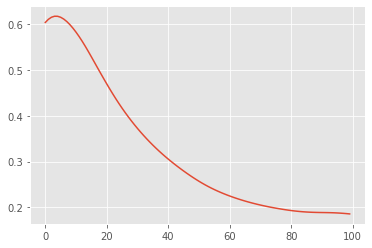

In [11]:
x = np.arange(0, len(loss_over_time))
plt.plot(x, loss_over_time)

Let's see the difference in optimization speed if we try out an optimizer on **Momentum** and **RMSProp** instead.

Modify the code above to accept an optimizer parameter.

In [12]:
### TODO : Modify the main method to accept an optimizer parameter
###        Create an if-else statement to change the optimizer function based on this parameter
###        For momentum and rmsprop, set a learning rate of 1e-3
###        Additionally for momentum, set the momentum hyperparameter to 0.9

momentum_loss, momentum_weight = main("momentum")
rmsprop_loss, rmsprop_weight = main("rmsprop")
adam_loss, adam_weight = main("adam")

Epoch = 1, train accuracy = 50.00%, test accuracy = 46.67%
Epoch = 2, train accuracy = 50.00%, test accuracy = 46.67%
Epoch = 3, train accuracy = 51.43%, test accuracy = 46.67%
Epoch = 4, train accuracy = 51.43%, test accuracy = 46.67%
Epoch = 5, train accuracy = 52.86%, test accuracy = 46.67%
Epoch = 6, train accuracy = 52.86%, test accuracy = 43.33%
Epoch = 7, train accuracy = 55.71%, test accuracy = 53.33%
Epoch = 8, train accuracy = 60.00%, test accuracy = 60.00%
Epoch = 9, train accuracy = 62.86%, test accuracy = 56.67%
Epoch = 10, train accuracy = 65.71%, test accuracy = 53.33%
Epoch = 11, train accuracy = 65.71%, test accuracy = 53.33%
Epoch = 12, train accuracy = 65.71%, test accuracy = 56.67%
Epoch = 13, train accuracy = 65.71%, test accuracy = 56.67%
Epoch = 14, train accuracy = 67.14%, test accuracy = 56.67%
Epoch = 15, train accuracy = 67.14%, test accuracy = 56.67%
Epoch = 16, train accuracy = 67.14%, test accuracy = 60.00%
Epoch = 17, train accuracy = 70.00%, test accurac

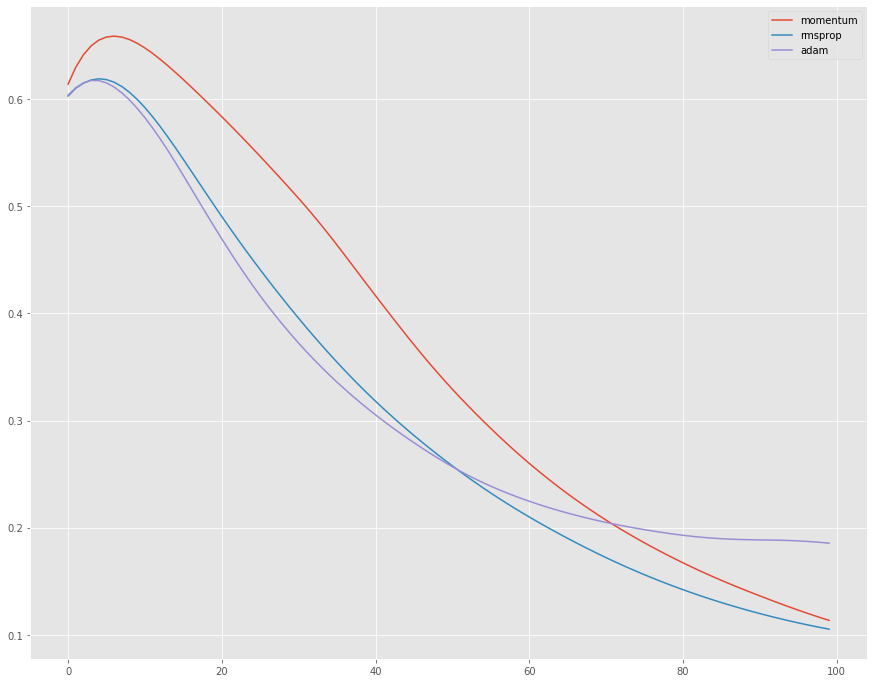

In [13]:
# Visualize all the optimizer's loss graph together

%matplotlib inline
plt.figure(figsize=(15,12))
plt.plot(momentum_loss, label="momentum")
plt.plot(rmsprop_loss, label="rmsprop")
plt.plot(adam_loss,label="adam")
plt.legend(loc="upper right")
# plt.show()

**Sanity Check: **
You should see all three lines decaying. In this particular example, RMSProp reaches lower loss faster.

____________

# Experiment 2: Iris dataset

Now, let's create the network again for the iris dataset. This is a real dataset that distinguishes whether a flower is an *Iris Setosa, Iris Versicolour, Iris Virginica* given the flower's *sepal width, sepal length, petal width, and petal length*. You can read more about it here: https://archive.ics.uci.edu/ml/datasets/iris

### Importing the data

In [14]:
import numpy as np 
from sklearn import datasets

# Read iris data from sklearn
iris   = datasets.load_iris()
data   = iris["data"]
target = iris["target"]

# Add a column of 1s for bias
N, M  = data.shape
X = np.ones((N, M + 1))
X[:, 1:] = data

# Convert into one-hot vectors
num_labels = len(np.unique(target))
Y = np.eye(num_labels)[target] 

print(Y)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0.

Check out how `y` looks like

### Splitting our train from test set

In [15]:
### TODO : Set the test size to 0.33, and the random seed to RANDOM_SEED (42)
### START CODE HERE ###
RANDOM_SEED = 42
tf.random.set_random_seed(RANDOM_SEED)
X_train, X_test, y_train, y_test = train_test_split(X,Y ,test_size=0.33)
### END CODE HERE ###

Let's check the shape of our data:

In [16]:
print("X_train shape :", X_train.shape)
print("y_train shape :", y_train.shape)

X_train shape : (100, 5)
y_train shape : (100, 3)


## Build a 2 layer network
Modify the network we built above to fit the iris dataset. Account for any changes, like in the number of features and the number of outputs.

In [17]:
### TODO : Create the model from before, redesign it to fit the iris dataset
### HINT : Change the sigmoid_cross_entropy to softmax_cross_entropy
def main(optimizer_fn):
    # loss_over_time will log down the loss per epoch
    loss_over_time = np.array([])


    ### START CODE HERE ###
    n_input = 5
    n_hidden = 10 # same as part 1 
    n_output = 3 
    ### END CODE HERE ###

    # **(b)** initialize weights variables 
    # TODO : Initialize the weights
    ### START CODE HERE ###
    w1 = tf.random.normal(shape=(n_input, n_hidden), stddev=0.1,seed=42)
    w2 = tf.random.normal(shape=(n_hidden, n_output), stddev=0.1,seed=42)
    weights = {
        'w1': tf.Variable(w1),
        'w2': tf.Variable(w2)
    }
    ### END CODE HERE ###

    # **(c)** initialize our data placeholders
    # TODO : Initialize out data placeholders
    ### START CODE HERE ###
    X = tf.placeholder("float32", shape=[None, n_input])
    y = tf.placeholder("float32", shape=[None, n_output])
    ### END CODE HERE ### 
    
    # **(d)** do forward propagation
    # TODO : Call the forward propagation code, and pass the proper weight values
    ### START CODE HERE ###
    a2, z2 = do_forwardprop(X, weights['w1'], weights['w2'])
    ### END CODE HERE ### 
    
    # **(e)** get the predictions
    predict  = tf.argmax(a2, axis=1)

    # **(f)** calculate for the loss (predictions - ground truth)
    # tf.reduce_mean gets the mean
    # tf.nn.sigmoid_cross_entropy_with_logits gets the raw score (z2) and computes for the probability
    #       it also computes for the loss
    loss      = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=z2))
    
    # **(g)** do backward propagation to update/optimize the weight variables
    if optimizer_fn == "momentum":
        optimizer = tf.train.MomentumOptimizer(learning_rate=1e-3, momentum=0.9).minimize(loss) 
    elif optimizer_fn == "rmsprop":
        optimizer = tf.train.RMSPropOptimizer(learning_rate=1e-3).minimize(loss) 
    elif optimizer_fn == "adam":
        optimizer = tf.train.AdamOptimizer().minimize(loss) 
    elif optimizer_fn == "gd":
        optimizer = tf.train.GradientDescentOptimizer().minimize(loss)
    
        
    # Finally, we run the computational graph
    session = tf.Session()
    init = tf.global_variables_initializer()
    session.run(init)

    for epoch in range(100):
        # Train with each example
        for i in range(len(X_train)):
            _, l = session.run([optimizer, loss], feed_dict={X: X_train[i: i + 1], y: y_train[i: i + 1]})

        # add current loss to loss_over_time
        loss_over_time = np.append(loss_over_time, l)
        
        train_accuracy = np.mean(np.argmax(y_train, axis=1) == session.run(predict, feed_dict={X: X_train, y: y_train}))
        test_accuracy  = np.mean(np.argmax(y_test, axis=1) == session.run(predict, feed_dict={X: X_test, y: y_test}))
        print("Epoch = %d, train accuracy = %.2f%%, test accuracy = %.2f%%"
              % (epoch + 1, 100. * train_accuracy, 100. * test_accuracy))

    weights = session.run(weights)
    session.close()
    
    return loss_over_time, weights

loss_over_time, weights = main("adam")

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

Epoch = 1, train accuracy = 32.00%, test accuracy = 36.00%
Epoch = 2, train accuracy = 69.00%, test accuracy = 62.00%
Epoch = 3, train accuracy = 69.00%, test accuracy = 62.00%
Epoch = 4, train accuracy = 69.00%, test accuracy = 62.00%
Epoch = 5, train accuracy = 69.00%, test accuracy = 62.00%
Epoch = 6, train accuracy = 69.00%, test accuracy = 62.00%
Epoch = 7, train accuracy = 69.00%, test accuracy = 62.00%
Epoch = 8, train accuracy = 69.00%, test accuracy = 62.00%
Epoch = 9, train accuracy = 69.00%, test accuracy = 62.00%
Epoch = 10, train accuracy = 69.00%, test accuracy = 62.00%
Epoch = 11, train accuracy = 70.00%, test accuracy = 62.00%
Epoch = 12, train accuracy = 70.00%, test accuracy = 66.00%
Epoch = 13, train accuracy = 71.00%, test accuracy = 66.00%
Epoch = 14, train accuracy = 72.00%, t

**Sanity Check:**

You should get a train and test accuracy ~97%

Text(0, 0.5, 'Loss')

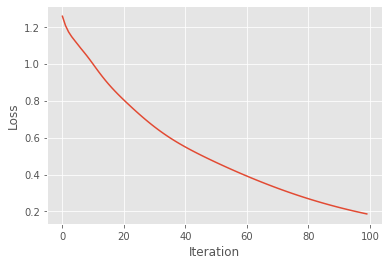

In [18]:
# Plot the errors
x = np.arange(0, len(loss_over_time))
plt.plot(x, loss_over_time)
plt.xlabel("Iteration")
plt.ylabel("Loss")

____________

The following are optional

# Try these out:

- See if you can get a good accuracy with the spiral and circle dataset (see below)
- Create a 3 layer network

## Experiment 3 : Circle Dataset

In [19]:
def generate_dummy_circle_data(num_points):
    r = np.random.uniform(0,2,num_points)
    theta = np.random.uniform(0,2*np.pi,num_points)
    inner_circle = np.array([r*np.sin(theta), r*np.cos(theta)]).T
    
    r = np.random.uniform(5,7,num_points)
    theta = 2*np.pi*np.arange(num_points)/num_points
    outer_circle = np.array([r*np.sin(theta), r*np.cos(theta)]).T

    X = np.concatenate((inner_circle,outer_circle),axis=0)
    y = np.concatenate((np.ones(num_points),np.zeros(num_points)),axis=0)
    
    randIdx = np.arange(X.shape[0])
    np.random.shuffle(randIdx)
    
    X = X[randIdx]
    y = y[randIdx].astype(int)
    
    return X, y
    
def generate_dummy_spiral_data(num_points, num_spiral):
    r = np.random.uniform(-0.1, 0.1,num_points) + 5*np.arange(num_points)/num_points
    theta = np.random.uniform(-0.1, 0.1,num_points) + 2*np.pi*1.25*np.arange(num_points)/num_points
    spiral = np.array([r*np.sin(theta), r*np.cos(theta)]).T
    y = np.ones(num_points)

    for i in range(1,num_spiral+1):
        r = np.random.uniform(-0.1, 0.1,num_points) + 5*np.arange(num_points)/num_points
        theta = np.random.uniform(-0.1, 0.1,num_points) + 2*np.pi*1.25*np.arange(num_points)/num_points + 2*i*np.pi/num_spiral
        tmp_spiral = np.array([r*np.sin(theta), r*np.cos(theta)]).T

        spiral = np.concatenate((spiral,tmp_spiral),axis=0)
        if i % 2 == 1:
            y = np.concatenate((y,np.zeros(num_points)),axis=0)
        else:
            y = np.concatenate((y,np.ones(num_points)),axis=0)

    randIdx = np.arange(spiral.shape[0])
    np.random.shuffle(randIdx)

    X = spiral[randIdx]
    y = y[randIdx].astype(int)

    return X, y

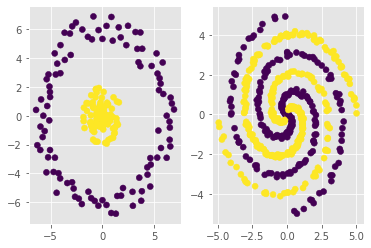

In [20]:
X_circle,y_circle = generate_dummy_circle_data(100)
plt.subplot(121)
plt.scatter(X_circle[:,0],X_circle[:,1],c=y_circle)

X_spiral,y_spiral = generate_dummy_spiral_data(100,4)
plt.subplot(122)
plt.scatter(X_spiral[:,0],X_spiral[:,1],c=y_spiral)

In [21]:
n_output = 2
Y_circle = np.zeros(shape=(len(y_circle),n_output))
Y_circle[np.arange(0, len(y_circle)),y_circle] =1

Y_spiral = np.zeros(shape=(len(y_spiral),n_output))
Y_spiral[np.arange(0, len(y_spiral)),y_spiral] =1

## Circle

In [22]:
N, M  = X_circle.shape

X = np.ones((N, M + 1))
X[:, 1:] = X_circle

 #Convert into one-hot vectors
num_labels = len(np.unique(y_circle))
Y = np.eye(num_labels)[y_circle]

In [23]:
### TODO : Set the test size to 0.33, and the random seed to RANDOM_SEED (42)
### START CODE HERE ###
RANDOM_SEED = 42
tf.random.set_random_seed(RANDOM_SEED)
X_train, X_test, y_train, y_test = train_test_split(X,Y ,test_size=0.33)
### END CODE HERE ###

In [24]:
print(X_train.shape,y_train.shape)

(134, 3) (134, 2)


In [25]:
def do_forwardprop(X, W1, W2, W3):
    '''
    Input :
    X : a matrix with shape (?, n_input) or (?, D), the input we will feed to our model; ? means arbitrary
    W1: a matrix with shape (n_input, n_hidden), weights of our first layer
    W2: a matrix with shape (n_hidden, n_output), weights of our 2nd layer
    W3: a matrix with shape (n_hidden, n_output), weights of our 3rd layer
    Output:
    z3 : a matrix with shape (n_instances,n_output), the score of the hidden layer 
    a3 : a matrix with shape (n_instances, n_output), the activation of the output 
    '''
    # TODO : Initialize the weight using tf.random.normal, give it a std dev of 0.1   
    #        Set the seed parameter to 42 so we will get the same result
    # HINT : Use tf.matmul for calculating the scores
    #        Use tf.nn.sigmoid for the sigmoid gate
    #        Make sure the matrix are ordered to be conformable
    ### START CODE HERE ###
    z1 = tf.matmul(X, W1)
    a1 = tf.nn.sigmoid(z1)
    
    z2 = tf.matmul(a1, W2)
    a2 = tf.nn.sigmoid(z2)

    z3 = tf.matmul(a2, W3)
    a3 = tf.nn.sigmoid(z3)

    ### END CODE HERE ###

    return a3, z3

def init_weights(n_input, n_hidden, n_output):
    """ Weight initialization """
    # Declare the size of the weights
    # TODO : Initialize the weight using tf.random.normal, give it a std dev of 0.1   
    #        Set the seed parameter to 42 so we will get the same result
    ### START CODE HERE ###
    w1 = tf.random.normal(shape=(n_input, n_hidden), stddev=0.1,seed=RANDOM_SEED) # (3, 10)
    w2 = tf.random.normal(shape=(n_hidden, n_hidden), stddev=0.1,seed=RANDOM_SEED) # (10, 10)
    w3 = tf.random.normal(shape=(n_hidden, n_output), stddev=0.1,seed=RANDOM_SEED) # (10, 2)
    ### END CODE HERE ###
    
    # Here, we will declare our weights as tf.Variables
    # Inputs in TensorFlow that are variables will be updated during gradient descent
    # If we want our weights to be updated, we have to declare them as  variables
    weights = {
        'w1': tf.Variable(w1),
        'w2': tf.Variable(w2),
        'w3': tf.Variable(w3)
    }

    return weights

weights = init_weights(n_input, n_hidden, n_output)

In [26]:
### TODO : Create the model from before, redesign it to fit the iris dataset
### HINT : Change the sigmoid_cross_entropy to softmax_cross_entropy
def main(optimizer_fn):
    # loss_over_time will log down the loss per epoch
    loss_over_time = np.array([])


    ### START CODE HERE ###
    n_input = 3
    n_hidden = 10
    n_output = 2 
    ### END CODE HERE ###

    # **(b)** initialize weights variables 
    # TODO : Initialize the weights
    ### START CODE HERE ###
    weights = init_weights(n_input, n_hidden, n_output)
    ### END CODE HERE ###

    # **(c)** initialize our data placeholders
    # TODO : Initialize out data placeholders
    ### START CODE HERE ###
    X = tf.placeholder("float32", shape=[None, n_input])
    y = tf.placeholder("float32", shape=[None, n_output])
    ### END CODE HERE ### 
    
    # **(d)** do forward propagation
    # TODO : Call the forward propagation code, and pass the proper weight values
    ### START CODE HERE ###
    a3, z3 = do_forwardprop(X, weights['w1'], weights['w2'], weights['w3'])
    ### END CODE HERE ### 
    
    # **(e)** get the predictions
    predict  = tf.argmax(a3, axis=1)

    # **(f)** calculate for the loss (predictions - ground truth)
    # tf.reduce_mean gets the mean
    # tf.nn.sigmoid_cross_entropy_with_logits gets the raw score (z2) and computes for the probability
    #       it also computes for the loss
    loss      = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=z3))
    
    # **(g)** do backward propagation to update/optimize the weight variables
    if optimizer_fn == "momentum":
        optimizer = tf.train.MomentumOptimizer(learning_rate=1e-3, momentum=0.9).minimize(loss) 
    elif optimizer_fn == "rmsprop":
        optimizer = tf.train.RMSPropOptimizer(learning_rate=1e-3).minimize(loss) 
    elif optimizer_fn == "adam":
        optimizer = tf.train.AdamOptimizer().minimize(loss) 
    elif optimizer_fn == "gd":
        optimizer = tf.train.GradientDescentOptimizer().minimize(loss)
    
        
    # Finally, we run the computational graph
    session = tf.Session()
    init = tf.global_variables_initializer()
    session.run(init)

    for epoch in range(100):
        # Train with each example
        for i in range(len(X_train)):
            _, l = session.run([optimizer, loss], feed_dict={X: X_train[i: i + 1], y: y_train[i: i + 1]})

        # add current loss to loss_over_time
        loss_over_time = np.append(loss_over_time, l)
        
        train_accuracy = np.mean(np.argmax(y_train, axis=1) == session.run(predict, feed_dict={X: X_train, y: y_train}))
        test_accuracy  = np.mean(np.argmax(y_test, axis=1) == session.run(predict, feed_dict={X: X_test, y: y_test}))
        print("Epoch = %d, train accuracy = %.2f%%, test accuracy = %.2f%%"
              % (epoch + 1, 100. * train_accuracy, 100. * test_accuracy))

    weights = session.run(weights)
    session.close()
    
    return loss_over_time, weights

loss_over_time, weights = main("adam")


Epoch = 1, train accuracy = 48.51%, test accuracy = 53.03%
Epoch = 2, train accuracy = 48.51%, test accuracy = 53.03%
Epoch = 3, train accuracy = 48.51%, test accuracy = 45.45%
Epoch = 4, train accuracy = 51.49%, test accuracy = 46.97%
Epoch = 5, train accuracy = 51.49%, test accuracy = 46.97%
Epoch = 6, train accuracy = 51.49%, test accuracy = 46.97%
Epoch = 7, train accuracy = 51.49%, test accuracy = 46.97%
Epoch = 8, train accuracy = 51.49%, test accuracy = 46.97%
Epoch = 9, train accuracy = 51.49%, test accuracy = 46.97%
Epoch = 10, train accuracy = 51.49%, test accuracy = 46.97%
Epoch = 11, train accuracy = 51.49%, test accuracy = 46.97%
Epoch = 12, train accuracy = 51.49%, test accuracy = 46.97%
Epoch = 13, train accuracy = 51.49%, test accuracy = 46.97%
Epoch = 14, train accuracy = 51.49%, test accuracy = 46.97%
Epoch = 15, train accuracy = 60.45%, test accuracy = 50.00%
Epoch = 16, train accuracy = 65.67%, test accuracy = 53.03%
Epoch = 17, train accuracy = 66.42%, test accurac

Text(0, 0.5, 'Loss')

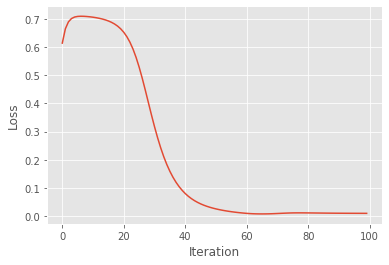

In [27]:
# Plot the errors
x = np.arange(0, len(loss_over_time))
plt.plot(x, loss_over_time)
plt.xlabel("Iteration")
plt.ylabel("Loss")

## Spiral

In [28]:
N, M  = X_spiral.shape

X = np.ones((N, M + 1))
X[:, 1:] = X_spiral

 #Convert into one-hot vectors
num_labels = len(np.unique(y_spiral))
Y = np.eye(num_labels)[y_spiral]

In [29]:
### TODO : Set the test size to 0.33, and the random seed to RANDOM_SEED (42)
### START CODE HERE ###
RANDOM_SEED = 42
tf.random.set_random_seed(RANDOM_SEED)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33)
### END CODE HERE ###

In [30]:
### TODO : Create the model from before, redesign it to fit the iris dataset
### HINT : Change the sigmoid_cross_entropy to softmax_cross_entropy
def main(optimizer_fn):
    # loss_over_time will log down the loss per epoch
    loss_over_time = np.array([])


    ### START CODE HERE ###
    n_input = 3
    n_hidden = 10
    n_output = 2 
    ### END CODE HERE ###

    # **(b)** initialize weights variables 
    ### START CODE HERE ###
    weights = init_weights(n_input, n_hidden, n_output)
    ### END CODE HERE ###

    # **(c)** initialize our data placeholders
    # TODO : Initialize out data placeholders
    ### START CODE HERE ###
    X = tf.placeholder("float32", shape=[None, n_input])
    y = tf.placeholder("float32", shape=[None, n_output])
    ### END CODE HERE ### 
    
    # **(d)** do forward propagation
    # TODO : Call the forward propagation code, and pass the proper weight values
    ### START CODE HERE ###
    a3, z3 = do_forwardprop(X, weights['w1'], weights['w2'], weights['w3'])
    ### END CODE HERE ### 
    
    # **(e)** get the predictions
    predict  = tf.argmax(a3, axis=1)

    # **(f)** calculate for the loss (predictions - ground truth)
    # tf.reduce_mean gets the mean
    # tf.nn.sigmoid_cross_entropy_with_logits gets the raw score (z2) and computes for the probability
    #       it also computes for the loss
    loss      = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=z3))
    
    # **(g)** do backward propagation to update/optimize the weight variables
    if optimizer_fn == "momentum":
        optimizer = tf.train.MomentumOptimizer(learning_rate=1e-3, momentum=0.9).minimize(loss) 
    elif optimizer_fn == "rmsprop":
        optimizer = tf.train.RMSPropOptimizer(learning_rate=1e-3).minimize(loss) 
    elif optimizer_fn == "adam":
        optimizer = tf.train.AdamOptimizer().minimize(loss) 
    elif optimizer_fn == "gd":
        optimizer = tf.train.GradientDescentOptimizer().minimize(loss)
    
        
    # Finally, we run the computational graph
    session = tf.Session()
    init = tf.global_variables_initializer()
    session.run(init)

    for epoch in range(100):
        # Train with each example
        for i in range(len(X_train)):
            _, l = session.run([optimizer, loss], feed_dict={X: X_train[i: i + 1], y: y_train[i: i + 1]})

        # add current loss to loss_over_time
        loss_over_time = np.append(loss_over_time, l)
        
        train_accuracy = np.mean(np.argmax(y_train, axis=1) == session.run(predict, feed_dict={X: X_train, y: y_train}))
        test_accuracy  = np.mean(np.argmax(y_test, axis=1) == session.run(predict, feed_dict={X: X_test, y: y_test}))
        print("Epoch = %d, train accuracy = %.2f%%, test accuracy = %.2f%%"
              % (epoch + 1, 100. * train_accuracy, 100. * test_accuracy))

    weights = session.run(weights)
    session.close()
    
    return loss_over_time, weights

loss_over_time, weights = main("adam")


Epoch = 1, train accuracy = 60.90%, test accuracy = 58.18%
Epoch = 2, train accuracy = 60.90%, test accuracy = 58.18%
Epoch = 3, train accuracy = 60.90%, test accuracy = 58.18%
Epoch = 4, train accuracy = 60.90%, test accuracy = 58.18%
Epoch = 5, train accuracy = 60.90%, test accuracy = 58.18%
Epoch = 6, train accuracy = 60.90%, test accuracy = 58.18%
Epoch = 7, train accuracy = 60.90%, test accuracy = 58.18%
Epoch = 8, train accuracy = 60.90%, test accuracy = 58.18%
Epoch = 9, train accuracy = 60.90%, test accuracy = 58.18%
Epoch = 10, train accuracy = 60.90%, test accuracy = 58.18%
Epoch = 11, train accuracy = 60.90%, test accuracy = 58.18%
Epoch = 12, train accuracy = 60.90%, test accuracy = 58.18%
Epoch = 13, train accuracy = 60.90%, test accuracy = 58.18%
Epoch = 14, train accuracy = 60.90%, test accuracy = 58.18%
Epoch = 15, train accuracy = 60.90%, test accuracy = 58.18%
Epoch = 16, train accuracy = 60.90%, test accuracy = 58.18%
Epoch = 17, train accuracy = 60.90%, test accurac

Text(0, 0.5, 'Loss')

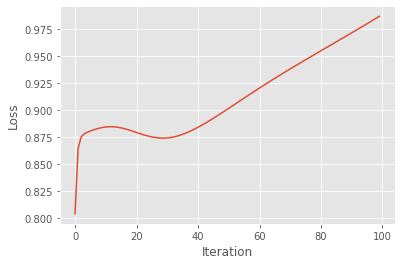

In [31]:
# Plot the errors
x = np.arange(0, len(loss_over_time))
plt.plot(x, loss_over_time)
plt.xlabel("Iteration")
plt.ylabel("Loss")